### 1.Load data files(train_u6lujuX_CVtuZ9i.csv and test_Y3wMUE5_7gLdaTN.csv)

In [170]:
import pandas as pd
import numpy as np
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
train_df = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
test_df = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [171]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### 2.Types of data columns

In [172]:
train_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [173]:
train_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### DATA CLEANING AND PREPROCESSING

### 3.Find missing values

In [174]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [175]:
test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

### 4.Impute missing values with mean (numerical variables)

In [176]:
train_df.fillna(train_df.mean(),inplace=True)
test_df.fillna(test_df.mean(),inplace=True)

### 5.Impute missing values with mode (categorical variables)

In [177]:
train_df['Married'].fillna(train_df['Married'].mode()[0],inplace=True)
train_df['Dependents'].fillna(train_df['Dependents'].mode()[0],inplace=True)
train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0],inplace=True)
train_df['Gender'].fillna(train_df['Gender'].mode()[0],inplace=True)
test_df['Dependents'].fillna(test_df['Dependents'].mode()[0],inplace=True)
test_df['Self_Employed'].fillna(test_df['Self_Employed'].mode()[0],inplace=True)
test_df['Gender'].fillna(test_df['Gender'].mode()[0],inplace=True)

In [178]:
test_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [179]:
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### PREDICTIVE MODELLING

### 6.Remove Loan_ID variable - Irrelevant

In [180]:
train_df = train_df.drop('Loan_ID',axis=1)
test_df = test_df.drop('Loan_ID',axis=1)

In [181]:
train_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


### 7.Create target variable

In [182]:
# now we need to seperate our data to 2 parts

X = train_df.drop('Loan_Status',1)
y = train_df.Loan_Status

### 8.Build dummy variables for categorical variables

In [183]:
train = pd.get_dummies(train_df)

In [184]:
test_df = pd.get_dummies(test_df)

In [185]:
X = pd.get_dummies(X)

In [186]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


### 9.Split train data for cross validation

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

### (a)LOGISTIC REGRESSION ALGORITHM

### 10.Fit model

In [188]:
model = LogisticRegression()

In [189]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### 11.Predict values for cv data

In [190]:
predictions = model.predict(X_test)

### 12.Print classification report

In [191]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           N       0.86      0.57      0.69        65
           Y       0.82      0.96      0.89       138

    accuracy                           0.83       203
   macro avg       0.84      0.76      0.79       203
weighted avg       0.84      0.83      0.82       203



### 13.Evaluate accuracy of model

In [192]:
accuracy_score(y_test,predictions)

0.8325123152709359

### (b)DECISION TREE ALGORITHM

### 14.Fit model

In [193]:
decisionTree = tree.DecisionTreeClassifier()
decisionTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### 15.Predict values for cv data

In [194]:
predictionsOnDecisionTree = decisionTree.predict(X_test)
predictionsOnDecisionTree

array(['Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'N',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'Y', 'N',
       'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'N', 'N

### 16.Evaluate accuracy of model

In [195]:
accuracy_score(y_test,predictionsOnDecisionTree)

0.7093596059113301

### (c)SUPPORT VECTOR MACHINE (SVM) ALGORITHM

### 17.Fit model

In [196]:
svm_model = svm.SVC()

In [197]:
svm_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### 18.Predict values for cv data

In [198]:
predictionsOnSVM = svm_model.predict(X_test)

### 19.Evaluate accuracy of model

In [199]:
accuracy_score(y_test,predictionsOnSVM)

0.6798029556650246

### (d)NAIVE BAYES ALGORITHM

### 20.Fit model

In [200]:
gaussianModel = GaussianNB()
gaussianModel.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### 21.Predict values for cv data

In [201]:
predictionsOnGaussian = gaussianModel.predict(X_test)

In [202]:
accuracy_score(y_test, predictionsOnGaussian)

0.8078817733990148

### 22.Evaluate accuracy of model

In [203]:
#Select best model in order of accuracy
#Naive Bayes - 0.8029556650246306
#Logistic Regression - 0.8325123152709359
#Decision Tree - 0.6847290640394089
#Support Vector Machine - 0.6896551724137931

# As we can see from the accuracy scores, LogisticRegression did the best in this dataset with 0.8325123152709359 accuracy score.



In [204]:
test_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.000000,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.000000,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.000000,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,0.825444,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.000000,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1


In [205]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [206]:
test_df['Loan_Status'] = model.predict(test_df)

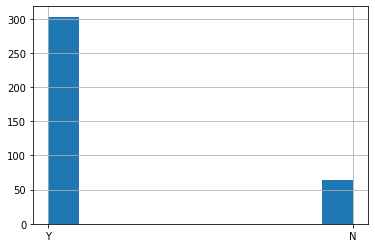

In [207]:
test_df['Loan_Status'].hist()

In [208]:
test_df.to_csv('answer.csv')